In [1]:
%matplotlib inline

In [2]:
import numpy as np
from astropy import units as u

In [3]:
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)

In [4]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube
import spectral_cube
import warnings
warnings.filterwarnings(action='ignore', category=spectral_cube.utils.StokesWarning)
warnings.filterwarnings(action='ignore', category=spectral_cube.utils.BeamWarning)

In [5]:
import os
os.chdir("/lustre/lard/projects/ALMA_IMF/2017.1.01355.L/imaging_results")

Text(0.5, 1.0, 'Custom Mask')

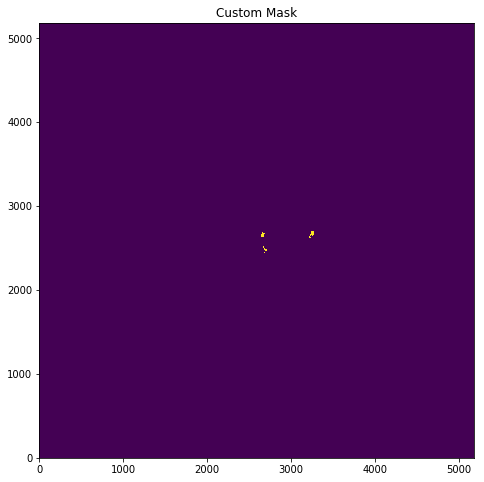

In [6]:
mask = SpectralCube.read('W51-E_B3_clean_mask.mask', format='casa_image')[0]
pl.imshow(mask.value, origin='lower', interpolation='none')
pl.title("Custom Mask")

In [7]:
imgs_dirty_b3, cubes_dirty_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_dirty')

In [8]:
imgs_before_b3, cubes_before_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0')

In [9]:
imgs_after_b3, cubes_after_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal1')

In [10]:
imgs_after2_b3, cubes_after2_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal2')

In [11]:
imgs_after3_b3, cubes_after3_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal3')

In [12]:
imgs_after4_b3, cubes_after4_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal4')

In [13]:
imgs_after5_b3, cubes_after5_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal5')

In [14]:
imgs_after6_b3, cubes_after6_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal5')

/lustre/naasc/users/aginsbur/repos/reduction/reduction/diagnostic_images.py:79: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax.imshow(imgs[imn].value[view], origin='lower', interpolation='none',


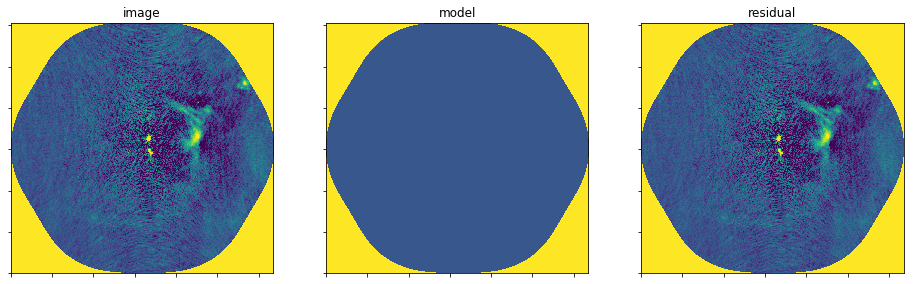

In [15]:
show(imgs_dirty_b3, vmin=-0.001, vmax=0.01)

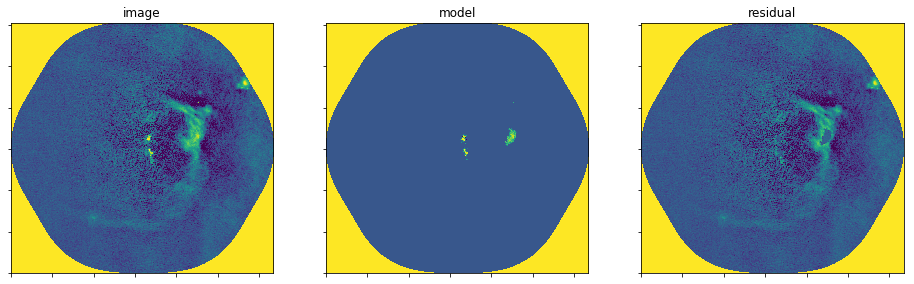

In [16]:
show(imgs_before_b3, vmin=-0.001, vmax=0.01)

/lustre/naasc/users/aginsbur/repos/reduction/reduction/diagnostic_images.py:83: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax.contour(imgs['mask'].value[view], levels=[0.5], colors=['w'],


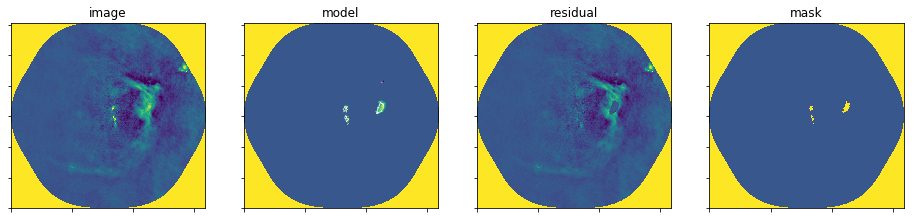

In [17]:
show(imgs_after_b3, vmin=-0.001, vmax=0.01)

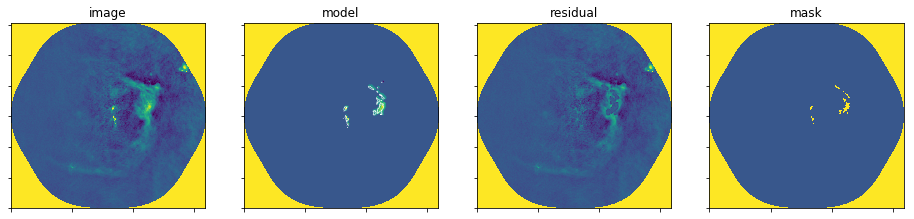

In [18]:
show(imgs_after2_b3, vmin=-0.001, vmax=0.01)

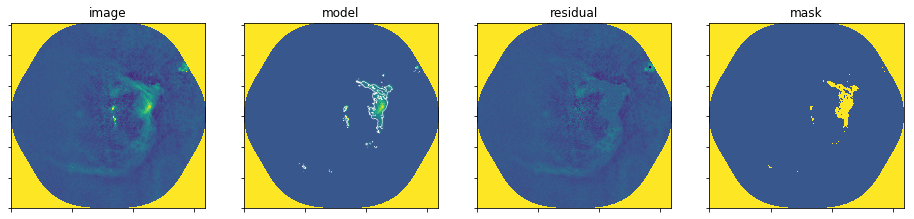

In [19]:
show(imgs_after3_b3, vmin=-0.001, vmax=0.01)

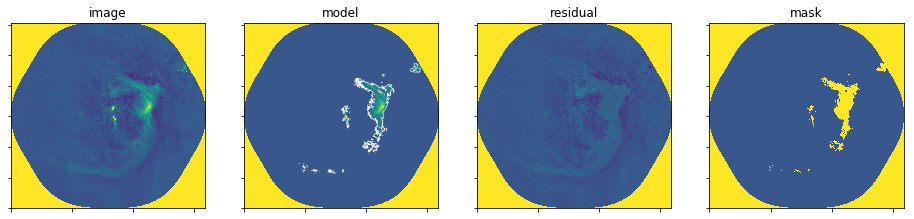

In [20]:
show(imgs_after4_b3, vmin=-0.001, vmax=0.01)

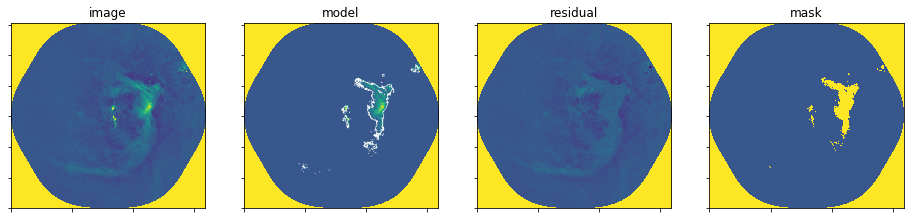

In [21]:
show(imgs_after5_b3, vmin=-0.001, vmax=0.01)

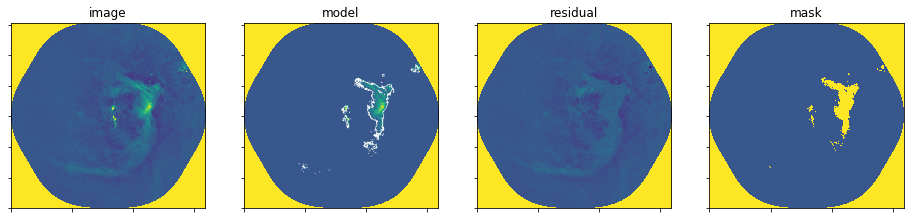

In [22]:
show(imgs_after6_b3, vmin=-0.001, vmax=0.01)

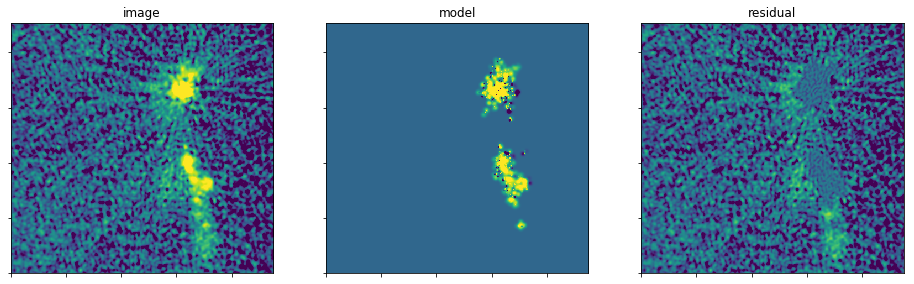

In [23]:
show(imgs_before_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

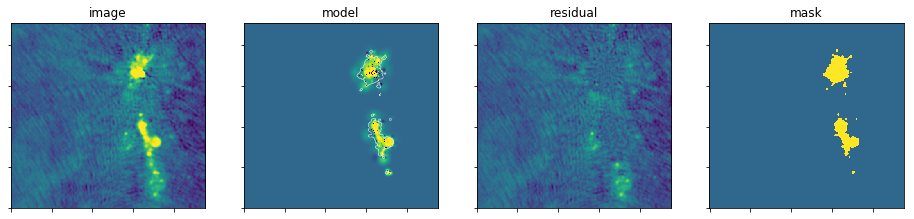

In [24]:
show(imgs_after_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

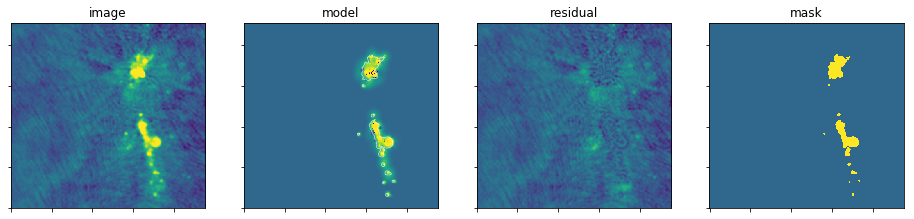

In [25]:
show(imgs_after2_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

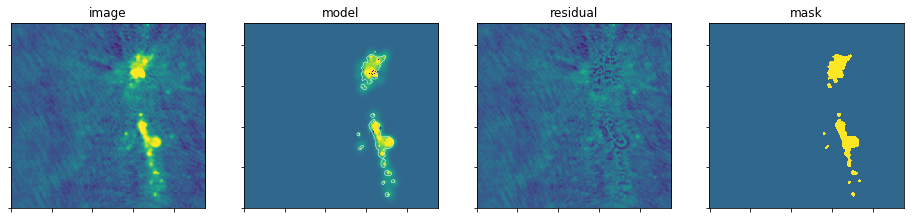

In [26]:
show(imgs_after3_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

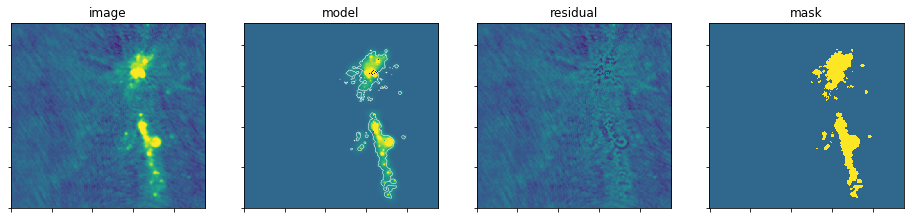

In [27]:
show(imgs_after4_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

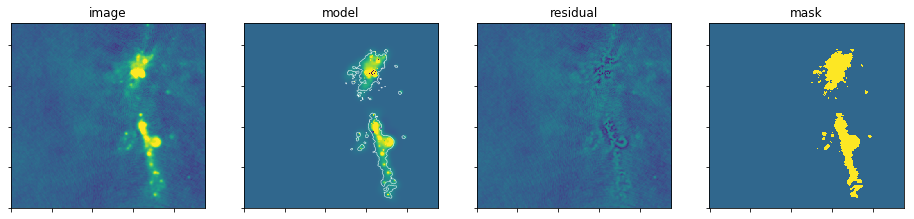

In [28]:
show(imgs_after5_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

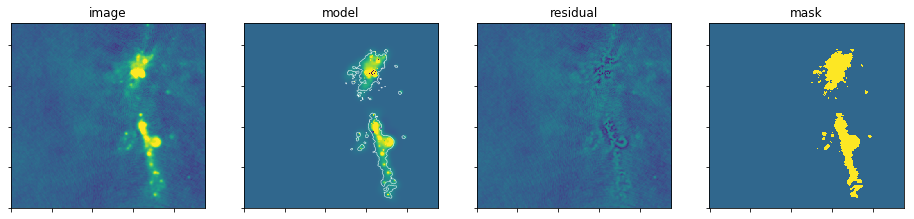

In [29]:
show(imgs_after6_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

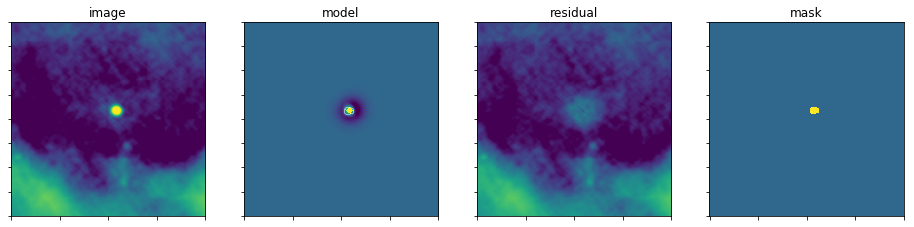

In [30]:
show(imgs_after_b3, vmin=-0.001, vmax=0.0075, zoom=[slice(1950,2150), slice(2150,2350)])

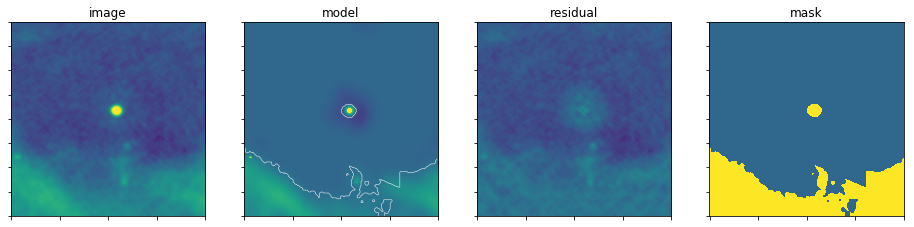

In [31]:
show(imgs_after6_b3, vmin=-0.001, vmax=0.0075, zoom=[slice(1950,2150), slice(2150,2350)])

In [32]:
from astropy import stats
for imgs in (imgs_before_b3, imgs_after_b3, imgs_after2_b3, imgs_after3_b3, imgs_after4_b3, imgs_after5_b3, imgs_after6_b3):
    rms = np.nanstd(imgs['residual'].value*u.Jy/u.beam) # residual has bad header units
    peak = np.nanmax(imgs['image'].quantity)
    total = np.nansum(imgs['image'].quantity)
    postotal = (imgs['image'].quantity[imgs['image'].value>0]).sum()
    rms2 = stats.mad_std(imgs['image'].quantity, ignore_nan=True)
    beam = imgs['image'].beam
    print(f"peak/rms={peak/rms:6.1f}, peak/mad={peak/rms2:6.1f}, peak={peak:0.3f}, total={total:0.3f}, postotal={postotal:0.3f}, rms={rms:0.5f}, mad={rms2:0.5f},"
          f" beam={beam.major:0.2f}x{beam.minor:0.2f}")

/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


peak/rms= 571.9, peak/mad= 856.1, peak=0.265 Jy / beam, total=158.287 Jy / beam, postotal=1321.318 Jy / beam, rms=0.00046 Jy / beam, mad=0.00031 Jy / beam, beam=0.29 arcsecx0.26 arcsec
peak/rms=1224.3, peak/mad=2755.8, peak=0.409 Jy / beam, total=174.276 Jy / beam, postotal=870.576 Jy / beam, rms=0.00033 Jy / beam, mad=0.00015 Jy / beam, beam=0.29 arcsecx0.26 arcsec
peak/rms=1457.7, peak/mad=3077.2, peak=0.410 Jy / beam, total=217.650 Jy / beam, postotal=808.780 Jy / beam, rms=0.00028 Jy / beam, mad=0.00013 Jy / beam, beam=0.29 arcsecx0.26 arcsec
peak/rms=2633.8, peak/mad=3797.1, peak=0.410 Jy / beam, total=307.430 Jy / beam, postotal=710.587 Jy / beam, rms=0.00016 Jy / beam, mad=0.00011 Jy / beam, beam=0.29 arcsecx0.26 arcsec
peak/rms=3129.7, peak/mad=3956.9, peak=0.410 Jy / beam, total=313.624 Jy / beam, postotal=691.254 Jy / beam, rms=0.00013 Jy / beam, mad=0.00010 Jy / beam, beam=0.29 arcsecx0.26 arcsec
peak/rms=3510.8, peak/mad=4447.4, peak=0.408 Jy / beam, total=297.636 Jy / beam

# Compare first iteration (no selfcal) to full selfcal

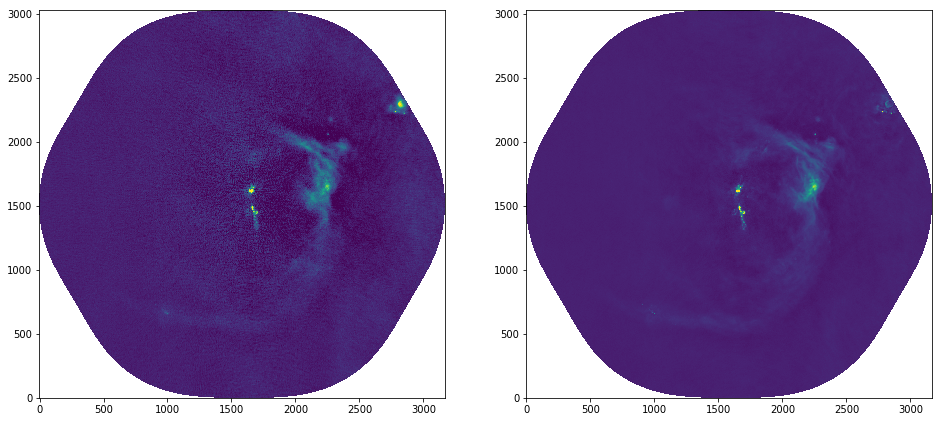

In [33]:
pl.subplot(1,2,1).imshow(imgs_before_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.01)
pl.subplot(1,2,2).imshow(imgs_after6_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.01)
#pl.subplot(1,3,3).imshow(imgs_after5_b6['image'].value-imgs_before_b6['image'].value, origin='lower', vmin=-0.01, vmax=0.01)

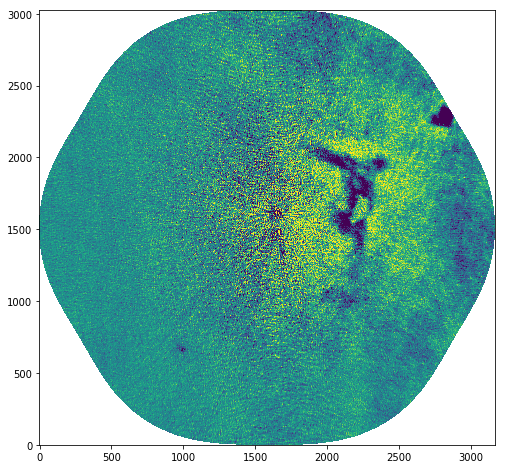

In [34]:
pl.gca().imshow(imgs_after6_b3['image'].value-imgs_before_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.001)

# Final iteration, robust 2 and robust -2

In [35]:
imgs_after6_b3_r2, cubes_after6_b3_r2 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal6')

/lustre/naasc/users/aginsbur/repos/reduction/reduction/diagnostic_images.py:79: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax.imshow(imgs[imn].value[view], origin='lower', interpolation='none',
/lustre/naasc/users/aginsbur/repos/reduction/reduction/diagnostic_images.py:83: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax.contour(imgs['mask'].value[view], levels=[0.5], colors=['w'],


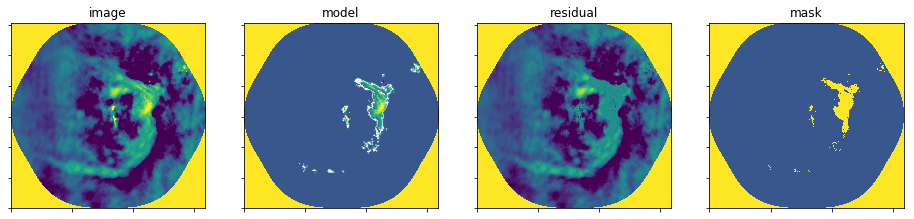

In [36]:
show(imgs_after6_b3_r2, vmin=-0.001, vmax=0.01)

In [37]:
imgs_after6_b3_rm2, cubes_after6_b3_rm2 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust-2_selfcal6')

/lustre/naasc/users/aginsbur/repos/reduction/reduction/diagnostic_images.py:79: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax.imshow(imgs[imn].value[view], origin='lower', interpolation='none',
/lustre/naasc/users/aginsbur/repos/reduction/reduction/diagnostic_images.py:83: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ax.contour(imgs['mask'].value[view], levels=[0.5], colors=['w'],


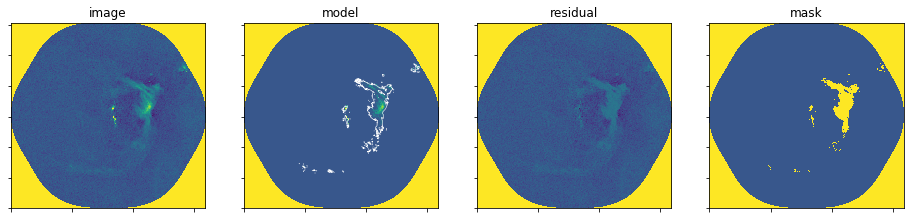

In [38]:
show(imgs_after6_b3_rm2, vmin=-0.001, vmax=0.01)

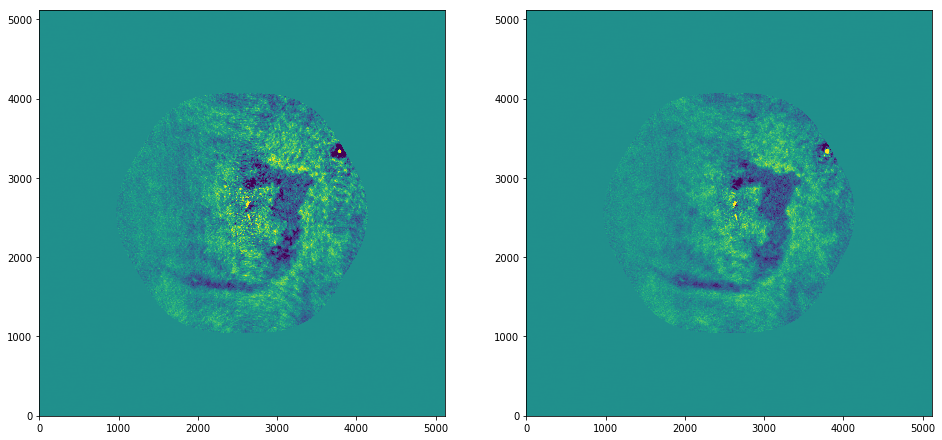

In [45]:
selfcal3_tt1 = SpectralCube.read('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal3.image.tt1', format='casa_image')
selfcal5_tt1 = SpectralCube.read('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal5.image.tt1', format='casa_image')
pl.subplot(1,2,1).imshow(selfcal3_tt1[0].value, vmin=-0.01, vmax=0.01, origin='lower')
pl.subplot(1,2,2).imshow(selfcal5_tt1[0].value, vmin=-0.01, vmax=0.01, origin='lower')